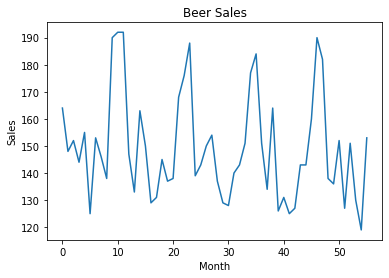

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file = r'data_set/beer.txt'
df = pd.read_csv(file)
plt.figure()
plt.title('Beer Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.plot(df['Sales'])  # 只有索引和一列数据时，可以这样用
plt.show()

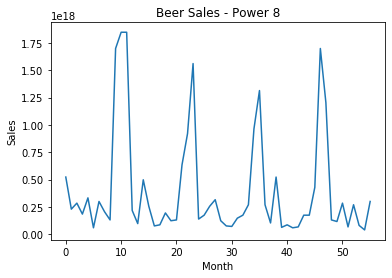

In [2]:
# 用幂的方式处理，突显季节趋势
plt.figure()
plt.title('Beer Sales - Power 8')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.plot(np.power(df['Sales'], 8))  # 只有索引和一列数据时，可以这样用
plt.show()

In [3]:
a = [1, 2, 3, 4, 5, 6]
b = [2, 3, 1, 0, 2, 3]
print(np.power(a, b))

[  1   8   3   1  25 216]


In [4]:
T = df.rolling(2, center=True).mean().rolling(12, center=True).mean()
print(T)

         Sales
0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7   157.541667
8   156.208333
9   156.041667
10  156.750000
11  155.916667
12  155.083333
13  155.000000
14  154.291667
15  153.916667
16  153.000000
17  151.416667
18  150.583333
19  150.083333
20  150.166667
21  150.041667
22  149.666667
23  150.166667
24  150.416667
25  149.625000
26  149.041667
27  149.375000
28  148.875000
29  148.208333
30  148.083333
31  148.416667
32  148.541667
33  148.750000
34  148.166667
35  146.750000
36  146.333333
37  146.125000
38  146.208333
39  146.333333
40  146.708333
41  147.625000
42  148.083333
43  147.458333
44  147.000000
45  146.583333
46  146.125000
47  147.000000
48  148.041667
49  147.916667
50  148.000000
51         NaN
52         NaN
53         NaN
54         NaN
55         NaN


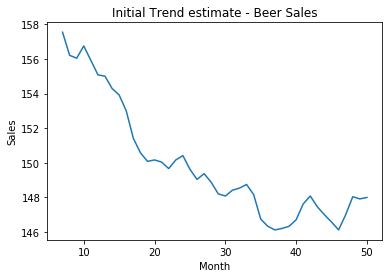

In [5]:
# 绘制初始趋势图形
plt.figure()
plt.title('Initial Trend estimate - Beer Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.plot(T['Sales'])
plt.show()

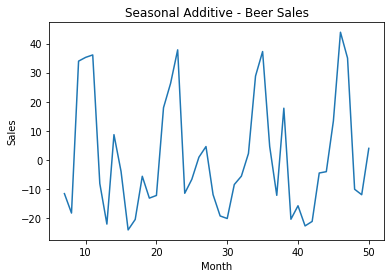

In [6]:
# 因为趋势图与季节放大图显示的相关不大，使用加法模型
S_additive = df['Sales'] - T['Sales']
plt.figure()
plt.title('Seasonal Additive - Beer Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.plot(S_additive)
plt.show()

In [7]:
# 实例季节的数据
safe_S = np.nan_to_num(S_additive)
# 还差4个月的数据
monthly_S = np.reshape(np.concatenate((safe_S, [0, 0, 0, 0]), axis=0), (5, 12))
# 求12个月平均因子
monthly_avg1 = np.mean(monthly_S[1:4, :], axis=0)
tiled_avg = np.tile(monthly_avg1, 5)
# 得到季节性调整后的趋势
seasonally_adjusted = df['Sales'] - tiled_avg[:56]

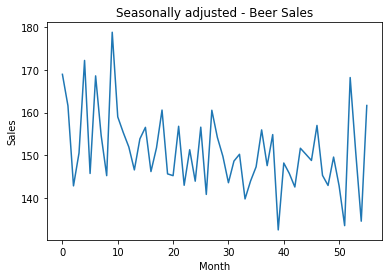

In [8]:
plt.figure()
plt.title('Seasonally adjusted - Beer Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.plot(seasonally_adjusted)
plt.show()

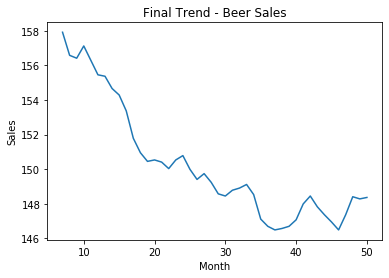

In [9]:
# 计算最终的趋势估计
T_final = seasonally_adjusted.rolling(2, center=True).mean().rolling(
    12, center=True).mean()
plt.figure()
plt.title('Final Trend - Beer Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.plot(T_final)
plt.show()